#

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import pingouin as pg
from lets_plot import *

LetsPlot.setup_html(no_js=True)

In [2]:
### You don't need to use these settings yourself
### — they are just here to make the book look nicer!
# Set the plot style for prettier charts:
#plt.style.use(
#    "https://raw.githubusercontent.com/aeturrell/core_python/main/plot_style.txt"
#)

In [3]:
#Python Walkthrough 1.1
df = pd.read_csv(
    "https://data.giss.nasa.gov/gistemp/tabledata_v4/NH.Ts+dSST.csv",
    skiprows=1,
    na_values="***",
)

In [4]:
df.head()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    145 non-null    int64  
 1   Jan     145 non-null    float64
 2   Feb     145 non-null    float64
 3   Mar     145 non-null    float64
 4   Apr     145 non-null    float64
 5   May     145 non-null    float64
 6   Jun     145 non-null    float64
 7   Jul     145 non-null    float64
 8   Aug     145 non-null    float64
 9   Sep     145 non-null    float64
 10  Oct     145 non-null    float64
 11  Nov     144 non-null    float64
 12  Dec     144 non-null    float64
 13  J-D     144 non-null    float64
 14  D-N     143 non-null    float64
 15  DJF     144 non-null    float64
 16  MAM     145 non-null    float64
 17  JJA     145 non-null    float64
 18  SON     144 non-null    float64
dtypes: float64(18), int64(1)
memory usage: 21.6 KB

In [6]:
#Python Walkthrough 1.2

df = df.set_index("Year")
df.head()
df.tail()

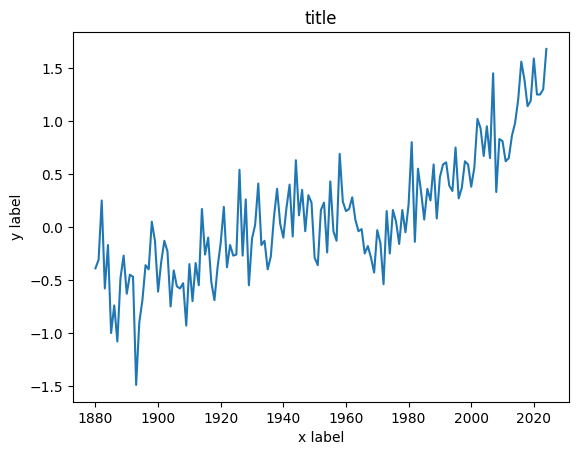

In [7]:
fig, ax = plt.subplots()
df["Jan"].plot(ax=ax)
ax.set_ylabel("y label")
ax.set_xlabel("x label")
ax.set_title("title")
plt.show()

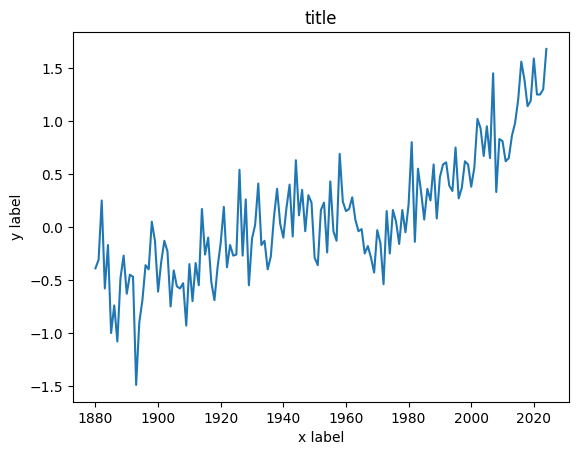

In [8]:
fig, ax = plt.subplots()
ax.plot(df.index, df["Jan"])
ax.set_ylabel("y label")
ax.set_xlabel("x label")
ax.set_title("title")
plt.show()

Text(0, 0.5, 'Annual temperature anomalies')

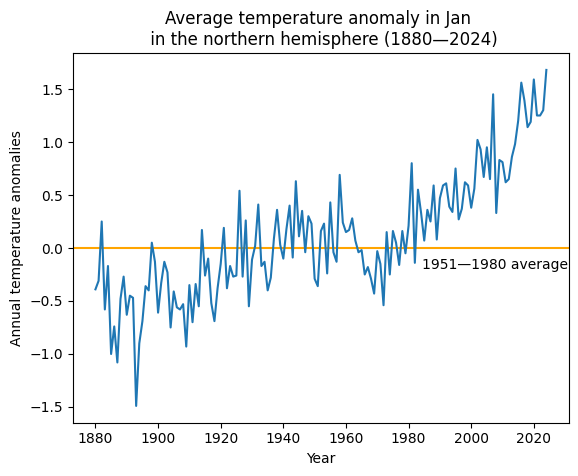

In [10]:
month = "Jan"
fig, ax = plt.subplots()
ax.axhline(0, color="orange")
ax.annotate("1951—1980 average", xy=(0.66, -0.2), xycoords=("figure fraction", "data"))
df[month].plot(ax=ax)
ax.set_title(
    f"Average temperature anomaly in {month} \n in the northern hemisphere (1880—{df.index.max()})"
)
ax.set_ylabel("Annual temperature anomalies")

Text(0, 0.5, 'Annual temperature anomalies')

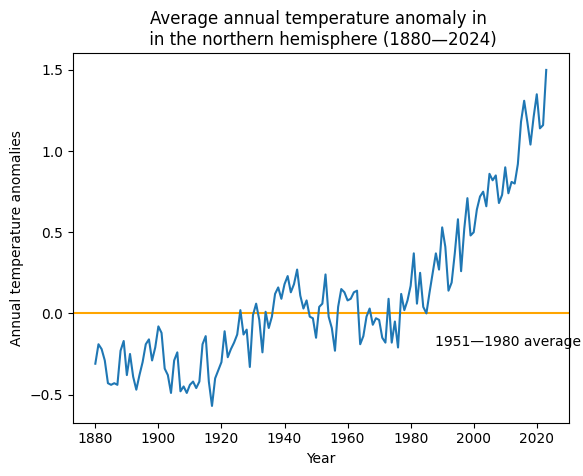

In [11]:
#Python Walkthrough 1.3
month = "J-D"
fig, ax = plt.subplots()
ax.axhline(0, color="orange")
ax.annotate("1951—1980 average", xy=(0.68, -0.2), xycoords=("figure fraction", "data"))
df[month].plot(ax=ax)
ax.set_title(
    f"Average annual temperature anomaly in \n in the northern hemisphere (1880—{df.index.max()})"
)
ax.set_ylabel("Annual temperature anomalies")

In [12]:
#Python Walkthrough 1.4
df["Period"] = pd.cut(
    df.index,
    bins=[1921, 1950, 1980, 2010],
    labels=["1921—1950", "1951—1980", "1981—2010"],
    ordered=True,
)

In [13]:
df["Period"].tail(20)

Year
2005    1981—2010
2006    1981—2010
2007    1981—2010
2008    1981—2010
2009    1981—2010
2010    1981—2010
2011          NaN
2012          NaN
2013          NaN
2014          NaN
2015          NaN
2016          NaN
2017          NaN
2018          NaN
2019          NaN
2020          NaN
2021          NaN
2022          NaN
2023          NaN
2024          NaN
Name: Period, dtype: category
Categories (3, object): ['1921—1950' < '1951—1980' < '1981—2010']

In [14]:
list_of_months = ["Jun", "Jul", "Aug"]
df[list_of_months].stack().head()

Year     
1880  Jun   -0.18
      Jul   -0.23
      Aug   -0.27
1881  Jun   -0.34
      Jul    0.08
dtype: float64

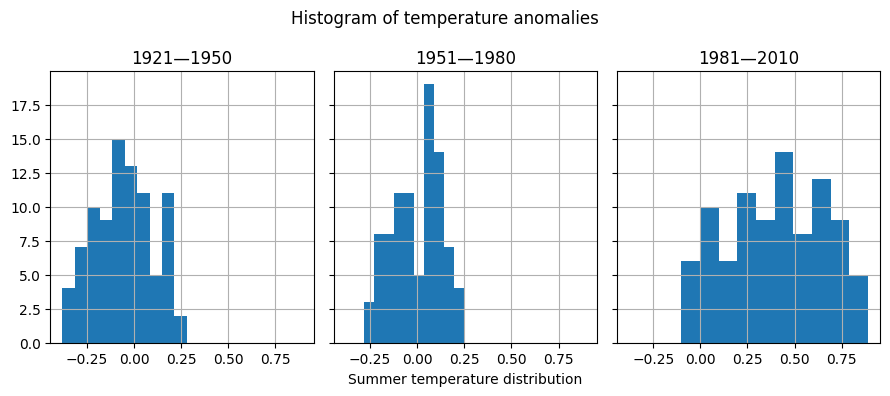

In [15]:
fig, axes = plt.subplots(ncols=3, figsize=(9, 4), sharex=True, sharey=True)
for ax, period in zip(axes, df["Period"].dropna().unique()):
    df.loc[df["Period"] == period, list_of_months].stack().hist(ax=ax)
    ax.set_title(period)
plt.suptitle("Histogram of temperature anomalies")
axes[1].set_xlabel("Summer temperature distribution")
plt.tight_layout()

In [16]:
#Python Walkthrough 1.5
# Create a variable that has years 1951 to 1980, and months Jan to Dec (inclusive)
temp_all_months = df.loc[(df.index >= 1951) & (df.index <= 1980), "Jan":"Dec"]
# Put all the data in stacked format and give the new columns sensible names
temp_all_months = (
    temp_all_months.stack()
    .reset_index()
    .rename(columns={"level_1": "month", 0: "values"})
)
# Take a look at this data:
temp_all_months

360 rows × 3 columns

In [17]:
quantiles = [0.3, 0.7]
list_of_percentiles = np.quantile(temp_all_months["values"], q=quantiles)

print(f"The cold threshold of {quantiles[0]*100}% is {list_of_percentiles[0]}")
print(f"The hot threshold of {quantiles[1]*100}% is {list_of_percentiles[1]}")

The cold threshold of 30.0% is -0.1
The hot threshold of 70.0% is 0.1

In [18]:
#Python Walkthrough 1.6
# Create a variable that has years 1981 to 2010, and months Jan to Dec (inclusive)
temp_all_months = df.loc[(df.index >= 1981) & (df.index <= 2010), "Jan":"Dec"]
# Put all the data in stacked format and give the new columns sensible names
temp_all_months = (
    temp_all_months.stack()
    .reset_index()
    .rename(columns={"level_1": "month", 0: "values"})
)
# Take a look at the start of this data data:
temp_all_months.head()

In [19]:
entries_less_than_q30 = temp_all_months["values"] < list_of_percentiles[0]
proportion_under_q30 = entries_less_than_q30.mean()
print(
    f"The proportion under {list_of_percentiles[0]} is {proportion_under_q30*100:.2f}%"
)

The proportion under -0.1 is 1.94%

In [20]:
proportion_over_q70 = (temp_all_months["values"] > list_of_percentiles[1]).mean()
print(f"The proportion over {list_of_percentiles[1]} is {proportion_over_q70*100:.2f}%")

The proportion over 0.1 is 84.72%

In [21]:
#Python Walkthrough 1.7
temp_all_months = (
    df.loc[:, "DJF":"SON"]
    .stack()
    .reset_index()
    .rename(columns={"level_1": "season", 0: "values"})
)
temp_all_months["Period"] = pd.cut(
    temp_all_months["Year"],
    bins=[1921, 1950, 1980, 2010],
    labels=["1921—1950", "1951—1980", "1981—2010"],
    ordered=True,
)
# Take a look at a cut of the data using `.iloc`, which provides position
temp_all_months.iloc[-135:-125]

In [22]:
grp_mean_var = temp_all_months.groupby(["season", "Period"])["values"].agg(
    [np.mean, np.var]
)
grp_mean_var

/var/folders/1l/hnt371j52k73j2w03zpp03s80000gn/T/ipykernel_3739/29752492.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grp_mean_var = temp_all_months.groupby(["season", "Period"])["values"].agg(
/var/folders/1l/hnt371j52k73j2w03zpp03s80000gn/T/ipykernel_3739/29752492.py:1: FutureWarning: The provided callable <function mean at 0x10a0751b0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  grp_mean_var = temp_all_months.groupby(["season", "Period"])["values"].agg(
/var/folders/1l/hnt371j52k73j2w03zpp03s80000gn/T/ipykernel_3739/29752492.py:1: FutureWarning: The provided callable <function var at 0x10a0753f0> is currently using SeriesGroupBy.var. In a future version of pan

In [23]:
min_year = 1880
(
    ggplot(temp_all_months, aes(x="Year", y="values", color="season"))
    + geom_abline(slope=0, color="black", size=1)
    + geom_line(size=1)
    + labs(
        title=f"Average annual temperature anomaly in \n in the northern hemisphere ({min_year}—{temp_all_months['Year'].max()})",
        y="Annual temperature anomalies",
    )
    + scale_x_continuous(format="d")
    + geom_text(
        x=min_year, y=0.1, label="1951—1980 average", hjust="left", color="black"
    )
)

<path d="M20.292512015615102 210.94947735191639 L20.292512015615102 210.94947735191639 L23.110916462228488 193.55955020589167 L25.929320908841873 209.01726322458032 L28.74772535545435 214.81390560658855 L31.566129802067735 242.8310104529617 L34.38453424868112 234.13604687994933 L37.202938695294506 237.03436807095343 L40.02134314190789 226.407190370605 L42.83974758852037 223.5088691796009 L45.65815203513375 187.76290782388344 L48.47655648174714 226.407190370605 L51.294960928360524 212.88169147925245 L54.11336537497391 234.13604687994933 L56.931769821586386 225.44108330693697 L59.75017426819977 223.5088691796009 L62.56857871481316 222.54276211593285 L65.38698316142654 232.20383275261324 L68.20538760803993 201.288406715236 L71.0237920546524 236.0682610072854 L73.84219650126579 225.44108330693697 L76.66060094787917 193.55955020589167 L79.47900539449256 182.93237250554324 L82.29740984110595 228.33940449794108 L85.11581428771842 226.407190370605 L87.93421873433181 237.03436807095343 L90.75262318094519 222.54276211593285 L93.57102762755858 205.15283496990816 L96.38943207417196 235.10215394361737 L99.20783652078444 238.96658219828953 L102.02624096739783 249.59375989863796 L104.84464541401121 230.27161862527717 L107.6630498606246 240.8987963256256 L110.48145430723798 219.64444092492874 L113.29985875385046 239.93268926195756 L116.11826320046384 221.5766550522648 L118.93666764707723 197.42397846056383 L121.75507209369061 227.37329743427307 L124.573476540304 260.2209375989864 L127.39188098691648 234.13604687994933 L130.21028543352986 225.44108330693697 L133.02868988014325 205.15283496990816 L135.84709432675663 209.01726322458032 L138.66549877337002 206.1189420335762 L141.4839032199825 234.13604687994933 L144.30230766659588 200.32229965156796 L147.12071211320927 209.98337028824835 L149.93911655982265 190.66122901488757 L152.75752100643604 219.64444092492874 L155.5759254530485 214.81390560658855 L158.3943298996619 216.74611973392462 L161.21273434627528 198.39008552423186 L164.03113879288867 203.22062084257206 L166.84954323950205 197.42397846056383 L169.66794768611544 213.84779854292051 L172.48635213272792 206.1189420335762 L175.3047565793413 210.94947735191639 L178.1231610259547 196.4578713968958 L180.94156547256807 197.42397846056383 L183.75996991918146 169.4068736141907 L186.57837436579393 201.288406715236 L189.39677881240732 176.16962305986698 L192.2151832590207 176.16962305986698 L195.0335877056341 182.93237250554324 L197.85199215224748 174.23740893253088 L200.67039659885995 167.47465948685462 L203.48880104547334 176.16962305986698 L206.30720549208672 176.16962305986698 L209.1256099387001 173.27130186886285 L211.9440143853135 195.49176433322776 L214.76241883192597 190.66122901488757 L217.58082327853936 198.39008552423186 L220.39922772515274 189.69512195121953 L223.21763217176613 188.72901488755147 L226.0360366183795 162.64412416851442 L228.854441064992 199.35619258789993 L231.67284551160537 217.71222679759268 L234.49124995821876 216.74611973392462 L237.30965440483214 199.35619258789993 L240.12805885144553 181.9662654418752 L242.946463298058 172.30519480519482 L245.7648677446714 207.08504909724422 L248.58327219128478 178.10183718720305 L251.40167663789816 174.23740893253088 L254.22008108451155 195.49176433322776 L257.038485531124 214.81390560658855 L259.8568899777374 207.08504909724422 L262.6752944243508 200.32229965156796 L265.4936988709642 176.16962305986698 L268.31210331757757 180.03405131453914 L271.13050776419004 193.55955020589167 L273.9489122108034 194.52565726955973 L276.7673166574168 210.94947735191639 L279.5857211040302 200.32229965156796 L282.4041255506436 172.30519480519482 L285.22252999725606 200.32229965156796 L288.04093444386945 186.7968007602154 L290.85933889048283 209.01726322458032 L293.6777433370962 167.47465948685462 L296.4961477837096 183.89847956921128 L299.314552230323 190.66122901488757 L302.13295667693546 176.16962305986698 L304.95136112354885 151.05083940449796 L307.76976557016224 181.00015837820717 L310.5881700

In [ ]:
#Python Walkthrough 1.8
df_co2 = pd.read_csv("D:\360MoveData\Users\75903\Desktop\SuYibo-Homework\Practice1 SuYibo/CO2-data.csv")
df_co2.head()

In [28]:
df_co2_june = df_co2.loc[df_co2["Month"] == 6]
df_co2_june.head()

In [29]:
df_temp_co2 = pd.merge(df_co2_june, df, on="Year")
df_temp_co2[["Year", "Jun", "Trend"]].head()

In [30]:
(
    ggplot(df_temp_co2, aes(x="Jun", y="Trend"))
    + geom_point(color="black", size=3)
    + labs(
        title="Scatterplot of temperature anomalies vs carbon dioxide emissions",
        y="Carbon dioxide levels (trend, mole fraction)",
        x="Temperature anomaly (degrees Celsius)",
    )
)

-0.2 
 
 
 
 
 
 
 
 
 0.0 
 
 
 
 
 
 
 
 
 0.2 
 
 
 
 
 
 
 
 
 0.4 
 
 
 
 
 
 
 
 
 0.6 
 
 
 
 
 
 
 
 
 0.8 
 
 
 
 
 
 
 
 
 1.0 
 
 
 
 
 
 
 
 
 
 
 320 
 
 
 
 
 
 
 340 
 
 
 
 
 
 
 360 
 
 
 
 
 
 
 380 
 
 
 
 
 
 
 400 
 
 
 
 
 
 
 
 
 Scatterplot of temperature anomalies vs carbon dioxide emissions 
 
 
 
 
 Carbon dioxide levels (trend, mole fraction) 
 
 
 
 
 Temperature anomaly (degrees Celsius)

In [31]:
df_temp_co2[["Jun", "Trend"]].corr(method="pearson")

In [32]:
(
    ggplot(df_temp_co2, aes(x="Year", y="Jun"))
    + geom_line(size=1)
    + labs(
        title="June temperature anomalies",
    )
    + scale_x_continuous(format="d")
)

<path d="M24.04475878746598 251.55604921394396 L24.04475878746598 251.55604921394396 L32.19552447813294 231.80895420369103 L40.3462901687999 223.03246753246754 L48.497055859465036 223.03246753246754 L56.647821550131994 291.05023923444975 L64.79858724079895 271.30314422419684 L72.94935293146591 282.27375256322625 L81.10011862213105 306.40909090909093 L89.25088431279801 249.36192754613808 L97.40165000346497 275.6913875598086 L105.5524156941301 273.49726589200276 L113.70318138479706 271.30314422419684 L121.85394707546402 258.13841421736157 L130.00471276612916 293.24436090225566 L138.15547845679612 284.4678742310321 L146.30624414746308 227.42071086807928 L154.45700983812822 302.02084757347916 L162.60777552879517 280.0796308954204 L170.75854121946213 306.40909090909093 L178.9093069101291 212.06185919343812 L187.06007260079423 293.24436090225566 L195.2108382914612 244.97368421052633 L203.36160398212814 220.83834586466165 L211.51236967279328 201.09125085440874 L219.66313536346024 260.3325358851675 L227.8139010541272 238.3913192071087 L235.96466674479234 242.77956254272044 L244.1154324354593 262.52665755297335 L252.26619812612626 231.80895420369103 L260.4169638167932 227.42071086807928 L268.56772950745835 174.7617908407382 L276.7184951981253 209.86773752563226 L284.86926088879227 157.20881749829118 L293.0200265794574 159.40293916609704 L301.17079227012437 253.75017088174982 L309.3215579607913 214.255980861244 L317.47232365145646 172.5676691729323 L325.6230893421234 152.8205741626794 L333.7738550327904 207.67361585782638 L341.9246207234555 155.0146958304853 L350.0753864141225 102.35577580314421 L358.22615210478943 185.73239917976758 L366.3769177954564 165.98530416951468 L374.52768348612153 148.43233082706766 L382.6784491767885 113.3263841421736 L390.82921486745545 144.0440874914559 L398.9799805581206 159.40293916609704 L407.13074624878755 89.19104579630894 L415.2815119394545 84.80280246069717 L423.43227763011964 119.90874914559123 L431.5830433207866 126.49111414900887 L439.73380901145356 115.52050580997948 L447.8845747021205 78.22043745727956 L456.03534039278566 95.77341079972658 L464.1861060834508 56.279220779220765 L472.3368717741196 91.38516746411483 L480.4876374647847 84.80280246069717 L488.6384031554535 29.949760765550224 L496.7891688461186 14.590909090909093 L504.93993453678377 58.473342447026624 " fill="none" stroke-width="2.2" stroke="rgb(71,71,71)" stroke-opacity="1.0">
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 1960 
 
 
 
 
 
 
 
 
 1970 
 
 
 
 
 
 
 
 
 1980 
 
 
 
 
 
 
 
 
 1990 
 
 
 
 
 
 
 
 
 2000 
 
 
 
 
 
 
 
 
 2010 
 
 
 
 
 
 
 
 
 
 
 -0.2 
 
 
 
 
 
 
 0.0 
 
 
 
 
 
 
 0.2 
 
 
 
 
 
 
 0.4 
 
 
 
 
 
 
 0.6 
 
 
 
 
 
 
 0.8 
 
 
 
 
 
 
 1.0 
 
 
 
 
 
 
 
 
 June temperature anomalies 
 
 
 
 
 Jun 
 
 
 
 
 Year

In [33]:
base_plot = ggplot(df_temp_co2) + scale_x_continuous(format="d")
plot_p = (
    base_plot
    + geom_line(aes(x="Year", y="Jun"), size=1)
    + labs(title="June temperature anomalies")
)
plot_q = (
    base_plot
    + geom_line(aes(x="Year", y="Trend"), size=1)
    + labs(title="Carbon dioxide emissions")
)
gggrid([plot_p, plot_q], ncol=2)

<path d="M17.13566787837408 251.55604921394396 L17.13566787837408 251.55604921394396 L22.944368854094137 231.80895420369103 L28.753069829816013 223.03246753246754 L34.56177080553607 223.03246753246754 L40.37047178125613 291.05023923444975 L46.179172756976186 271.30314422419684 L51.987873732696244 282.27375256322625 L57.7965747084163 306.40909090909093 L63.60527568413636 249.36192754613808 L69.41397665985824 275.6913875598086 L75.2226776355783 273.49726589200276 L81.03137861129835 271.30314422419684 L86.84007958701841 258.13841421736157 L92.64878056273847 293.24436090225566 L98.45748153845852 284.4678742310321 L104.2661825141804 227.42071086807928 L110.07488348990046 302.02084757347916 L115.88358446562052 280.0796308954204 L121.69228544134057 306.40909090909093 L127.50098641706063 212.06185919343812 L133.3096873927807 293.24436090225566 L139.11838836850075 244.97368421052633 L144.92708934422262 220.83834586466165 L150.73579031994268 201.09125085440874 L156.54449129566274 260.3325358851675 L162.3531922713828 238.3913192071087 L168.16189324710285 242.77956254272044 L173.9705942228229 262.52665755297335 L179.77929519854297 231.80895420369103 L185.58799617426484 227.42071086807928 L191.3966971499849 174.7617908407382 L197.20539812570496 209.86773752563226 L203.01409910142502 157.20881749829118 L208.82280007714508 159.40293916609704 L214.63150105286513 253.75017088174982 L220.440202028587 214.255980861244 L226.24890300430707 172.5676691729323 L232.05760398002712 152.8205741626794 L237.86630495574718 207.67361585782638 L243.67500593146724 155.0146958304853 L249.4837069071873 102.35577580314421 L255.29240788290736 185.73239917976758 L261.10110885862923 165.98530416951468 L266.9098098343493 148.43233082706766 L272.71851081006935 113.3263841421736 L278.5272117857894 144.0440874914559 L284.33591276150946 159.40293916609704 L290.1446137372295 89.19104579630894 L295.9533147129514 84.80280246069717 L301.76201568867145 119.90874914559123 L307.5707166643915 126.49111414900887 L313.37941764011157 115.52050580997948 L319.1881186158316 78.22043745727956 L324.9968195915517 95.77341079972658 L330.80552056727174 56.279220779220765 L336.6142215429936 91.38516746411483 L342.4229225187137 84.80280246069717 L348.23162349443373 29.949760765550224 L354.0403244701538 14.590909090909093 L359.84902544587385 58.473342447026624 " fill="none" stroke-width="2.2" stroke="rgb(71,71,71)" stroke-opacity="1.0">
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 1960 
 
 
 
 
 
 
 
 
 1970 
 
 
 
 
 
 
 
 
 1980 
 
 
 
 
 
 
 
 
 1990 
 
 
 
 
 
 
 
 
 2000 
 
 
 
 
 
 
 
 
 2010 
 
 
 
 
 
 
 
 
 
 
 -0.2 
 
 
 
 
 
 
 0.0 
 
 
 
 
 
 
 0.2 
 
 
 
 
 
 
 0.4 
 
 
 
 
 
 
 0.6 
 
 
 
 
 
 
 0.8 
 
 
 
 
 
 
 1.0 
 
 
 
 
 
 
 
 
 June temperature anomalies 
 
 
 
 
 Jun 
 
 
 
 
 Year 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 <path d="M17.366281074255312 306.4090909090909 L17.366281074255312 306.4090909090909 L23.253156014679917 303.0032722513089 L29.14003095510634 298.4197405997144 L35.026905895530945 298.03777962874824 L40.91378083595555 295.5232032365541 L46.80065577638197 292.69032603522123 L52.68753071680658 291.00333174678724 L58.57440565723118 291.1306520704427 L64.4612805976576 285.17842693955265 L70.34815553808221 283.8415635411709 L76.23503047850681 279.83097334602576 L82.12190541893324 275.279271775345 L88.00878035935784 272.4463945740124 L93.89565529978245 269.64534745359356 L99.78253024020887 267.99018324607323 L105.66940518063348 258.3774988100904 L111.55628012105808 258.3774988100904 L117.4431550614845 254.36690861494526 L123.33003000190911 252.93455497382206 L129.2169049423337 246.09108757734407 L135.10377988275832 240.39350309376505 L140.99065482318474 236.41474297953368 L146.87752976360935 230.0487267967635 L152.76440470403395 226.13362684435992 L158.65127964446037 222.05937648738677 L164.53815458488498 216.32996192289397 L170.42502952530958 212.00107091861014 L176.311904465736 207.44936934792963 L18